In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Config

In [56]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))
directory = '/data/project/general/aerosolretriev/'

In [57]:
#plot_dir =  directory +'/aerosol_results/forward_model_phase_noise_small_drop0/plots/hyperparameter_scans'
plot_dir =  directory +'/aerosol_results_mp/HyperParameterTrials/GraspOpen/GraspOpen2/plots'

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [58]:
result_dir =  directory +'/aerosol_results_mp/HyperParameterTrials/GraspOpen/GraspOpen2/'

In [59]:
model_dir =  directory +'/aerosol_results_mp/HyperParameterTrials/GraspOpen/GraspOpen2/models'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Load data

In [60]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)

In [61]:
config_columns = [col for col in df.columns if col.startswith('config/') if col.replace('config/', '') != 'datafile']
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [62]:
df

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
0    0.149146  0.149601    0.688641  0.689267   0.083088  0.089041   
1    0.122719  0.123228    0.558417  0.559260   0.072496  0.078357   
2    0.137113  0.137456    0.625135  0.625221   0.078434  0.084488   
3    0.148927  0.149868    0.689017  0.691790   0.082000  0.088121   
4    0.115888  0.115827    0.525509  0.523853   0.069137  0.074624   
5    0.126362  0.126460    0.573158  0.572244   0.074901  0.080540   
6    0.122415  0.122484    0.568599  0.567524   0.072410  0.077928   
7    0.122420  0.122715    0.560497  0.560215   0.072653  0.078290   
8    0.121869  0.122068    0.553993  0.553478   0.072950  0.078776   
9    0.111061  0.111348    0.510073  0.509773   0.067857  0.073860   
10   0.116190  0.116280    0.525877  0.524763   0.070070  0.075942   
11   0.115691  0.115951    0.527905  0.527742   0.071699  0.077675   
12   0.108602  0.108943    0.499402  0.499437   0.067240  0.073345   
13   0.106709  0.107173    0.482551  0.483004   0.065293  0.071663   
14   0.107244  0.107641    0.484261  0.484623   0.069127  0.075236   
15   0.107115  0.107538    0.495050  0.495419   0.066662  0.072972   
16   0.104845  0.105552    0.474355  0.475899   0.064899  0.071447   
17   0.108721  0.108914    0.490770  0.490064   0.068996  0.075344   
18   0.107231  0.107844    0.491995  0.493358   0.066656  0.073058   
19   0.104701  0.104704    0.475070  0.473535   0.067181  0.072783   
20   0.103890  0.103956    0.473673  0.472333   0.068069  0.074126   
21   0.105880  0.106347    0.490281  0.490715   0.065120  0.071872   
22   0.105073  0.105489    0.475118  0.475395   0.065058  0.071244   
23   0.111820  0.112337    0.503765  0.504666   0.068158  0.074531   
24   0.105044  0.105899    0.486282  0.488565   0.064816  0.071884   
25   0.102046  0.102570    0.461152  0.462001   0.063054  0.069407   
26   0.113292  0.113713    0.511196  0.511539   0.067350  0.074040   
27   0.097304  0.098159    0.446622  0.448583   0.062581  0.070296   
28   0.101465  0.102245    0.458040  0.459862   0.063122  0.070239   
29   0.097994  0.098114    0.444916  0.443960   0.064597  0.071121   
30   0.099372  0.100566    0.458112  0.461682   0.062238  0.070525   
31   0.101741  0.103246    0.458986  0.463881   0.061831  0.070943   
32   0.103574  0.104232    0.466656  0.467921   0.064871  0.072957   
33   0.101499  0.103025    0.469385  0.474273   0.062040  0.071822   
34   0.101795  0.103546    0.459837  0.465854   0.062751  0.071966   
35   0.108231  0.109362    0.488201  0.491750   0.065358  0.073533   

    median_percentile_max_error_train  median_percentile_max_error_val  \
0                            1.297736                         1.285661   
1                            1.065968                         1.057569   
2                            1.247292                         1.233935   
3                            1.292672                         1.292232   
4                            0.984513                         0.977024   
5                            1.083134                         1.077614   
6                            1.257952                         1.251460   
7                            1.169875                         1.155635   
8                            1.111177                         1.102335   
9                            0.787894                         0.782292   
10                           0.888177                         0.880526   
11                           0.829753                         0.824332   
12                           0.769731                         0.766369   
13                           0.763291                         0.759993   
14                           0.755568                         0.751367   
15                           0.890610                         0.886457   
16                           0.757882                         0.755781   
17                           0.854923                         0.848894   
18     

# Plot

## Generalisation of adjusted $R^2$

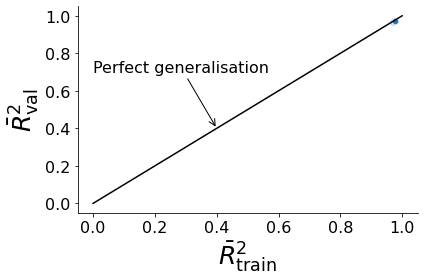

In [63]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

## Relationship between $R^2$ and rel. error

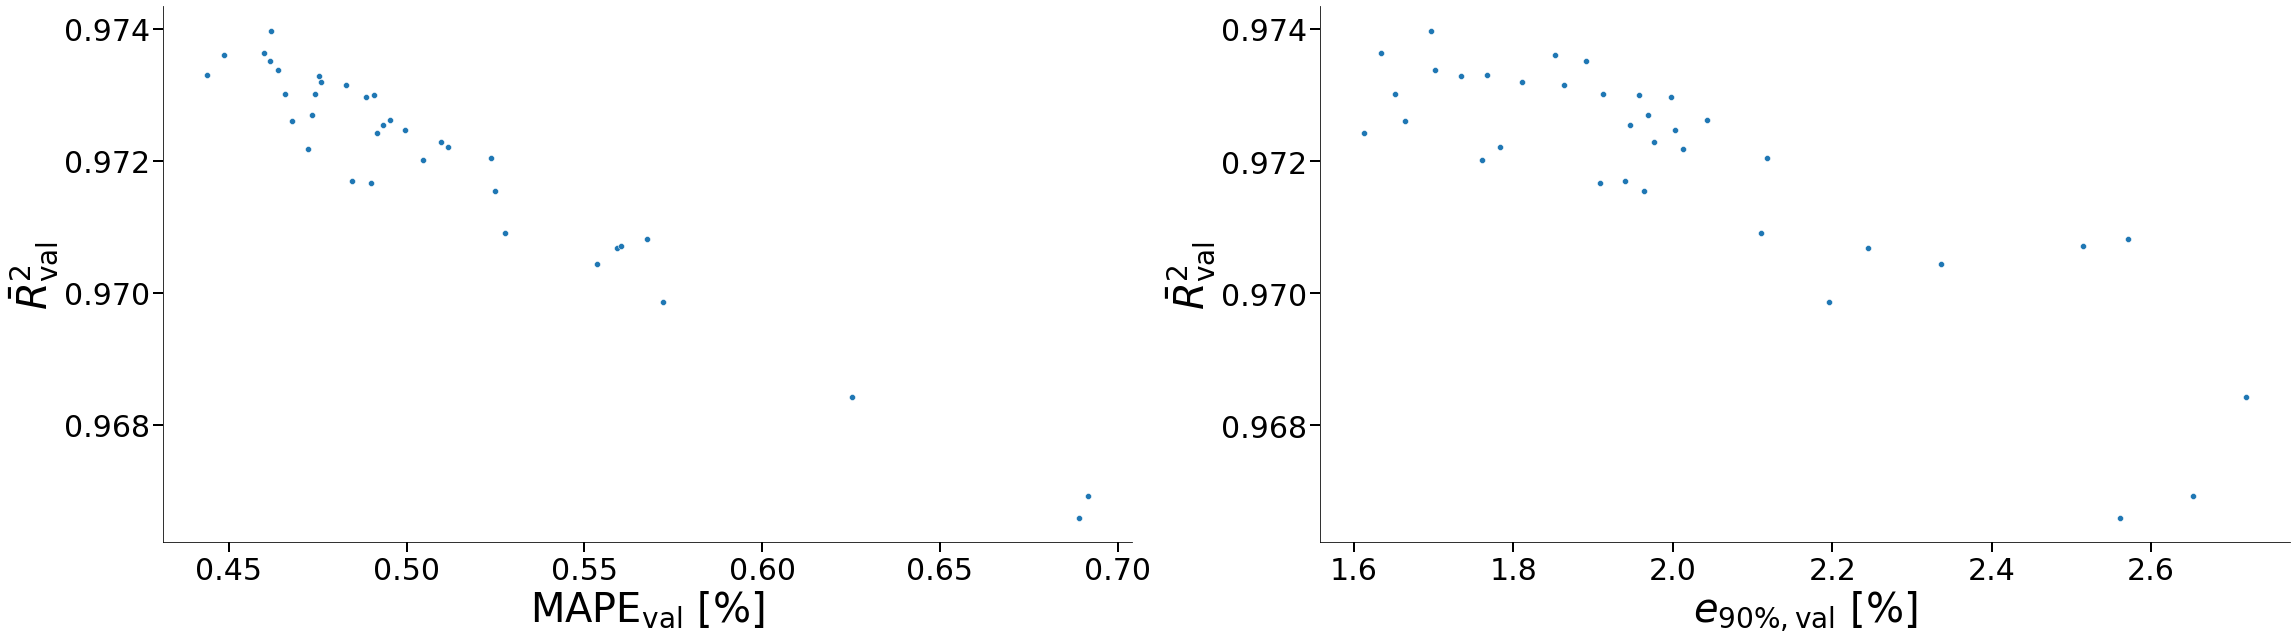

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(32, 9))

ax = axes[0]
sns.scatterplot(data=df, x='MAPE_val', y='r2_adj_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

ax = axes[1]
sns.scatterplot(data=df, x='90_percentile_max_error_val', y='r2_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

for ax in axes:
    ax.tick_params(labelsize=30, width=2, length=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

## Execution time vs. batch size

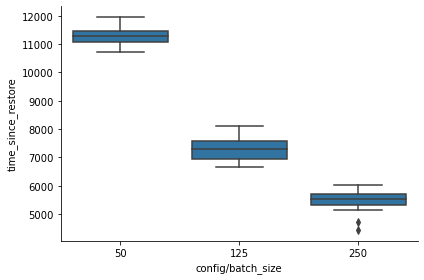

In [65]:
fig, ax = plt.subplots()

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/time_vs_batch_size')

## Dependence on the parameters

In [66]:
y_lim = [0.995, 1.005]
#y_lim = [0., 1.]

In [67]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [68]:
to_plot = df[config_columns + ['r2_adj_val']].rename(columns=config_column_labels)

In [69]:
to_plot_ow =to_plot.copy()

In [70]:
to_plot_ow

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                 relu          50      2      50         0.0005  MSE   
1                 relu         125      2      50         0.0005  MSE   
2                 relu         250      2      50         0.0005  MSE   
3                 relu          50      3      50         0.0005  MSE   
4                 relu         125      3      50         0.0005  MSE   
5                 relu         250      3      50         0.0005  MSE   
6                 relu          50      4      50         0.0005  MSE   
7                 relu         125      4      50         0.0005  MSE   
8                 relu         250      4      50         0.0005  MSE   
9                 relu          50      2      50         0.0005  MSE   
10                relu         125      2      50         0.0005  MSE   
11                relu         250      2      50         0.0005  MSE   
12                relu          50      3      50         0.0005  MSE   
13                relu         125      3      50         0.0005  MSE   
14                relu         250      3      50         0.0005  MSE   
15                relu          50      4      50         0.0005  MSE   
16                relu         125      4      50         0.0005  MSE   
17                relu         250      4      50         0.0005  MSE   
18                relu          50      2      50         0.0005  MSE   
19                relu         125      2      50         0.0005  MSE   
20                relu         250      2      50         0.0005  MSE   
21                relu          50      3      50         0.0005  MSE   
22                relu         125      3      50         0.0005  MSE   
23                relu         250      3      50         0.0005  MSE   
24                relu          50      4      50         0.0005  MSE   
25                relu         125      4      50         0.0005  MSE   
26                relu         250      4      50         0.0005  MSE   
27                relu          50      2      50         0.0005  MSE   
28                relu         125      2      50         0.0005  MSE   
29                relu         250      2      50         0.0005  MSE   
30                relu          50      3      50         0.0005  MSE   
31                relu         125      3      50         0.0005  MSE   
32                relu         250      3      50         0.0005  MSE   
33                relu          50      4      50         0.0005  MSE   
34                relu         125      4      50         0.0005  MSE   
35                relu         250      4      50         0.0005  MSE   

                                 optimizer  \
0   <class 'keras.optimizer_v2.adam.Adam'>   
1   <class 'keras.optimizer_v2.adam.Adam'>   
2   <class 'keras.optimizer_v2.adam.Adam'>   
3   <class 'keras.optimizer_v2.adam.Adam'>   
4   <class 'keras.optimizer_v2.adam.Adam'>   
5   <class 'keras.optimizer_v2.adam.Adam'>   
6   <class 'keras.optimizer_v2.adam.Adam'>   
7   <class 'keras.optimizer_v2.adam.Adam'>   
8   <class 'keras.optimizer_v2.adam.Adam'>   
9   <class 'keras.optimizer_v2.adam.Adam'>   
10  <class 'keras.optimizer_v2.adam.Adam'>   
11  <class 'keras.optimizer_v2.adam.Adam'>   
12  <class 'keras.optimizer_v2.adam.Adam'>   
13  <class 'keras.optimizer_v2.adam.Adam'>   
14  <class 'keras.optimizer_v2.adam.Adam'>   
15  <class 'keras.optimizer_v2.adam.Adam'>   
16  <class 'keras.optimizer_v2.adam.Adam'>   
17  <class 'keras.optimizer_v2.adam.Adam'>   
18  <class 'keras.optimizer_v2.adam.Adam'>   
19  <class 'keras.optimizer_v2.adam.Adam'>   
20  <class 'keras.optimizer_v2.adam.Adam'>   
21  <class 'keras.optimizer_v2.adam.Adam'>   
22  <class 'keras.optimizer_v2.adam.Adam'>   
23  <class 'keras.optimizer_v2.adam.Adam'>   
24  <class 'keras.optimizer_v2.adam.Adam'>   
25  <class 'keras.optimizer_v2.adam.Adam'>   
26  <class 'keras.optimizer_v2.adam.Adam'>   
27  <class 'k

/data/user/ponts_m/conda-envs/MasterEnv/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
/data/user/ponts_m/conda-envs/MasterEnv/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


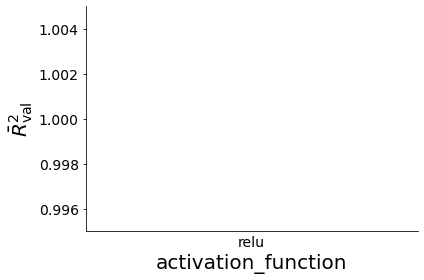

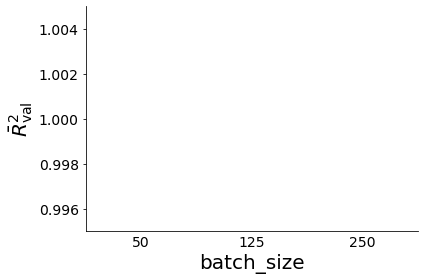

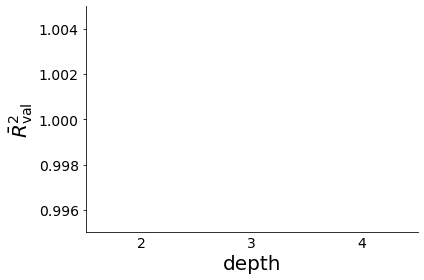

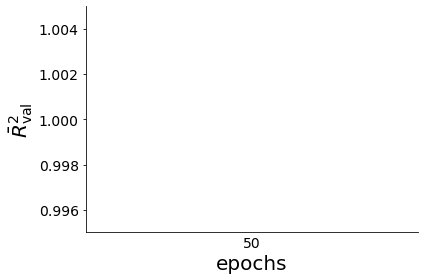

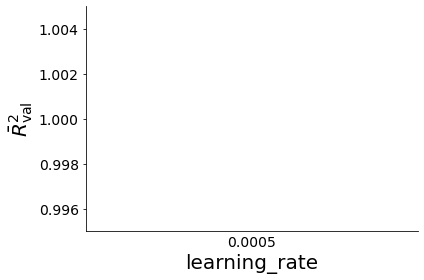

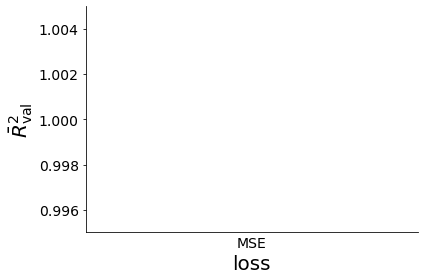

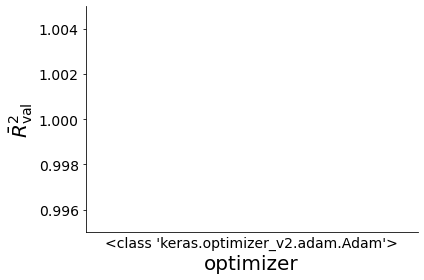

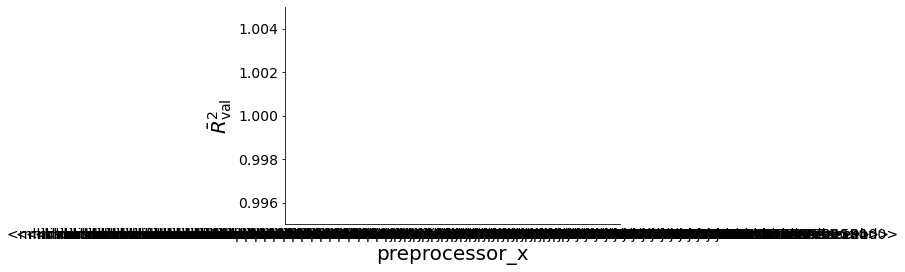

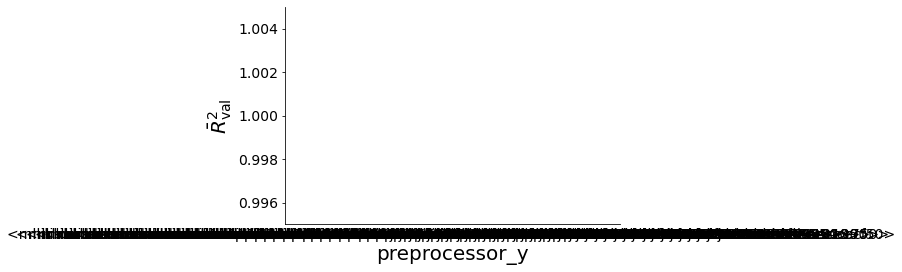

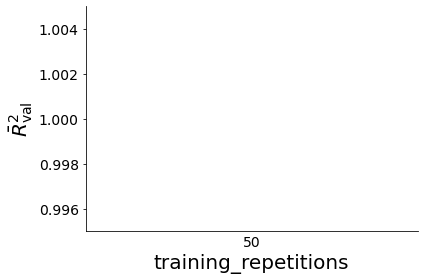

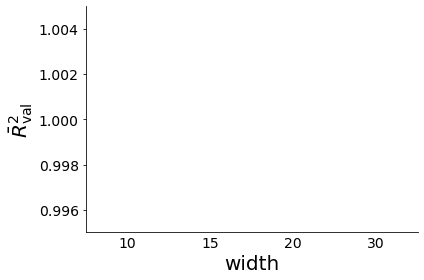

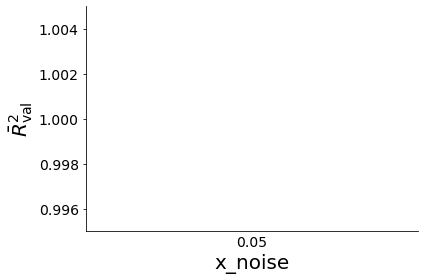

In [71]:
for param in to_plot.columns:
    if param == 'r2_adj_val':
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y='r2_adj_val', color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(y_lim)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

In [72]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [73]:
df[config_columns + ['r2_adj_val']]

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                        relu                 50             2             50   
1                        relu                125             2             50   
2                        relu                250             2             50   
3                        relu                 50             3             50   
4                        relu                125             3             50   
5                        relu                250             3             50   
6                        relu                 50             4             50   
7                        relu                125             4             50   
8                        relu                250             4             50   
9                        relu                 50             2             50   
10                       relu                125             2             50   
11                       relu                250             2             50   
12                       relu                 50             3             50   
13                       relu                125             3             50   
14                       relu                250             3             50   
15                       relu                 50             4             50   
16                       relu                125             4             50   
17                       relu                250             4             50   
18                       relu                 50             2             50   
19                       relu                125             2             50   
20                       relu                250             2             50   
21                       relu                 50             3             50   
22                       relu                125             3             50   
23                       relu                250             3             50   
24                       relu                 50             4             50   
25                       relu                125             4             50   
26                       relu                250             4             50   
27                       relu                 50             2             50   
28                       relu                125             2             50   
29                       relu                250             2             50   
30                       relu                 50             3             50   
31                       relu                125             3             50   
32                       relu                250             3             50   
33                       relu                 50             4             50   
34                       relu                125             4             50   
35                       relu                250             4             50   

    config/learning_rate config/loss                        config/optimizer  \
0                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
1                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
2                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
3                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
4                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
5                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
6                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
7                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
8                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
9                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
10                0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
11                0.0005         MSE  <class 

In [74]:
#g = sns.pairplot(data=df[config_columns + ['r2_adj_val']], hue='r2_adj_val', diag_kind='hist', corner=True)

In [75]:
len(config_columns)

12

In [76]:
len(config_column_labels)

12

In [77]:
to_plot = df[config_columns + ['r2_adj_val']].copy()
to_plot['r2_adj_val'], bins = pd.cut(df['r2_adj_val'], 5, retbins=True)
mean_points = [(bins[i] + bins[i-1]) / 2. for i in range(1, len(bins))]
to_plot['r2_adj_val'] = pd.cut(df['r2_adj_val'], 5, retbins=False, labels=mean_points)

In [78]:
to_plot['r2_adj_val']


/data/user/ponts_m/conda-envs/MasterEnv/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0     0.967321
1     0.970277
2     0.968801
3     0.967321
4     0.971754
5     0.970277
6     0.970277
7     0.970277
8     0.970277
9     0.971754
10    0.971754
11    0.970277
12    0.971754
13    0.973230
14    0.971754
15    0.973230
16    0.973230
17    0.971754
18    0.973230
19    0.973230
20    0.971754
21    0.973230
22    0.973230
23    0.971754
24    0.973230
25    0.973230
26    0.971754
27    0.973230
28    0.973230
29    0.973230
30    0.973230
31    0.973230
32    0.973230
33    0.973230
34    0.973230
35    0.971754
Name: r2_adj_val, dtype: category
Categories (5, float64): [0.967321 < 0.968801 < 0.970277 < 0.971754 < 0.973230]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


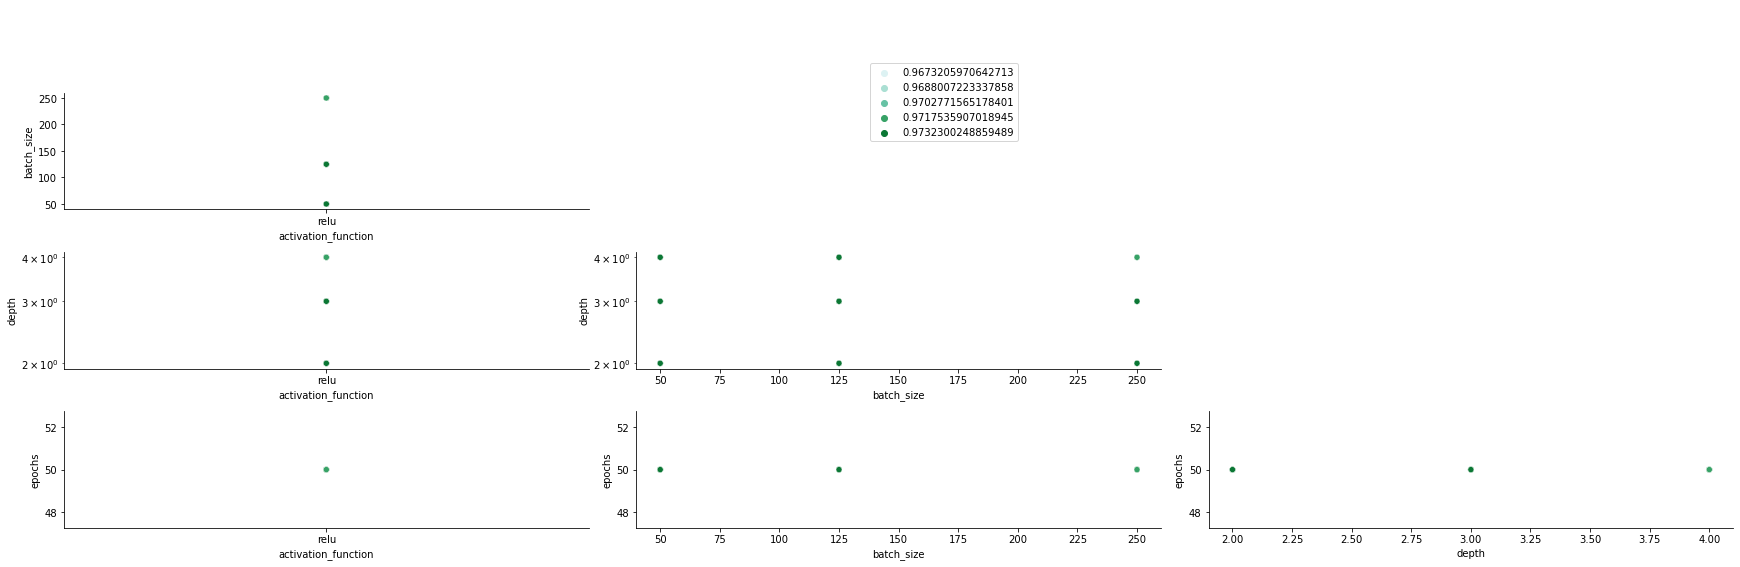

In [79]:
n_row = 4
n_col = 4
cols = config_columns

colors = sns.color_palette("BuGn_r", n_colors=len(to_plot['r2_adj_val'].unique()))
colors.reverse()

fig, axes = plt.subplots(n_row, n_col, figsize=(32, 9))
legend = True

for i in range(n_row):
    for j in range(n_col):
        ax = axes[i, j]
        if j >= i:
            ax.remove()
            continue
        sns.scatterplot(data=to_plot,
                        x=cols[j],
                        y=cols[i],
                        hue=to_plot['r2_adj_val'].tolist(),
                        palette=colors,
                        legend='brief' if legend else False,
                        ax=ax)
        if legend:
            legend = False

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(config_column_labels[config_columns[j]])
        ax.set_ylabel(config_column_labels[config_columns[i]])
        ax.legend().remove()
fig.tight_layout()
fig.legend(loc=(0.5, 0.75))

axes[2, 0].set_yscale('log')
axes[2, 1].set_yscale('log')

# Best configs

In [80]:
best_config = df.sort_values('r2_val', ascending=False).iloc[0, :]

In [81]:
df.sort_values('r2_adj_val', ascending=False)[config_columns + ['r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val','r2_val']].rename(columns=config_column_labels).head(20)

activation_function  batch_size  depth  epochs  learning_rate loss  \
25                relu         125      4      50         0.0005  MSE   
28                relu         125      2      50         0.0005  MSE   
27                relu          50      2      50         0.0005  MSE   
30                relu          50      3      50         0.0005  MSE   
31                relu         125      3      50         0.0005  MSE   
29                relu         250      2      50         0.0005  MSE   
22                relu         125      3      50         0.0005  MSE   
16                relu         125      4      50         0.0005  MSE   
13                relu         125      3      50         0.0005  MSE   
34                relu         125      4      50         0.0005  MSE   
33                relu          50      4      50         0.0005  MSE   
21                relu          50      3      50         0.0005  MSE   
24                relu          50      4      50         0.0005  MSE   
19                relu         125      2      50         0.0005  MSE   
15                relu          50      4      50         0.0005  MSE   
32                relu         250      3      50         0.0005  MSE   
18                relu          50      2      50         0.0005  MSE   
12                relu          50      3      50         0.0005  MSE   
35                relu         250      4      50         0.0005  MSE   
9                 relu          50      2      50         0.0005  MSE   

                                 optimizer  \
25  <class 'keras.optimizer_v2.adam.Adam'>   
28  <class 'keras.optimizer_v2.adam.Adam'>   
27  <class 'keras.optimizer_v2.adam.Adam'>   
30  <class 'keras.optimizer_v2.adam.Adam'>   
31  <class 'keras.optimizer_v2.adam.Adam'>   
29  <class 'keras.optimizer_v2.adam.Adam'>   
22  <class 'keras.optimizer_v2.adam.Adam'>   
16  <class 'keras.optimizer_v2.adam.Adam'>   
13  <class 'keras.optimizer_v2.adam.Adam'>   
34  <class 'keras.optimizer_v2.adam.Adam'>   
33  <class 'keras.optimizer_v2.adam.Adam'>   
21  <class 'keras.optimizer_v2.adam.Adam'>   
24  <class 'keras.optimizer_v2.adam.Adam'>   
19  <class 'keras.optimizer_v2.adam.Adam'>   
15  <class 'keras.optimizer_v2.adam.Adam'>   
32  <class 'keras.optimizer_v2.adam.Adam'>   
18  <class 'keras.optimizer_v2.adam.Adam'>   
12  <class 'keras.optimizer_v2.adam.Adam'>   
35  <class 'keras.optimizer_v2.adam.Adam'>   
9   <class 'keras.optimizer_v2.adam.Adam'>   

                                       preprocessor_x  \
25  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
28  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
27  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
30  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
31  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
29  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
22  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
16  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
13  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
34  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
33  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
21  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
24  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
19  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
15  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
32  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
18  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
12  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
35  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
9   <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                       preprocessor_y  training_repetitions  \
25  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   
28  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   
27  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...              

In [82]:
best_config.name

25

In [83]:
best_config['trial_id']

'054f5_00025'

# Worst configs

In [84]:
df.sort_values('r2_adj_val', ascending=True)[config_columns + ['r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(5)

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                relu          50      2      50         0.0005  MSE   
3                relu          50      3      50         0.0005  MSE   
2                relu         250      2      50         0.0005  MSE   
5                relu         250      3      50         0.0005  MSE   
8                relu         250      4      50         0.0005  MSE   

                                optimizer  \
0  <class 'keras.optimizer_v2.adam.Adam'>   
3  <class 'keras.optimizer_v2.adam.Adam'>   
2  <class 'keras.optimizer_v2.adam.Adam'>   
5  <class 'keras.optimizer_v2.adam.Adam'>   
8  <class 'keras.optimizer_v2.adam.Adam'>   

                                      preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
3  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
2  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
5  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   
8  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                      preprocessor_y  training_repetitions  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   
3  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   
2  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   
5  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   
8  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   

   width  x_noise  r2_adj_val  MAPE_val  median_percentile_max_error_val  \
0     10     0.05    0.966586  0.689267                         1.285661   
3     10     0.05    0.966919  0.691790                         1.292232   
2     10     0.05    0.968416  0.625221                         1.233935   
5     10     0.05    0.969855  0.572244                         1.077614   
8     10     0.05    0.970440  0.553478                         1.102335   

   90_percentile_max_error_val  
0                     2.561514  
3                     2.652164  
2                     2.718693  
5                     2.196155  
8                     2.336363

In [85]:
df

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
0    0.149146  0.149601    0.688641  0.689267   0.083088  0.089041   
1    0.122719  0.123228    0.558417  0.559260   0.072496  0.078357   
2    0.137113  0.137456    0.625135  0.625221   0.078434  0.084488   
3    0.148927  0.149868    0.689017  0.691790   0.082000  0.088121   
4    0.115888  0.115827    0.525509  0.523853   0.069137  0.074624   
5    0.126362  0.126460    0.573158  0.572244   0.074901  0.080540   
6    0.122415  0.122484    0.568599  0.567524   0.072410  0.077928   
7    0.122420  0.122715    0.560497  0.560215   0.072653  0.078290   
8    0.121869  0.122068    0.553993  0.553478   0.072950  0.078776   
9    0.111061  0.111348    0.510073  0.509773   0.067857  0.073860   
10   0.116190  0.116280    0.525877  0.524763   0.070070  0.075942   
11   0.115691  0.115951    0.527905  0.527742   0.071699  0.077675   
12   0.108602  0.108943    0.499402  0.499437   0.067240  0.073345   
13   0.106709  0.107173    0.482551  0.483004   0.065293  0.071663   
14   0.107244  0.107641    0.484261  0.484623   0.069127  0.075236   
15   0.107115  0.107538    0.495050  0.495419   0.066662  0.072972   
16   0.104845  0.105552    0.474355  0.475899   0.064899  0.071447   
17   0.108721  0.108914    0.490770  0.490064   0.068996  0.075344   
18   0.107231  0.107844    0.491995  0.493358   0.066656  0.073058   
19   0.104701  0.104704    0.475070  0.473535   0.067181  0.072783   
20   0.103890  0.103956    0.473673  0.472333   0.068069  0.074126   
21   0.105880  0.106347    0.490281  0.490715   0.065120  0.071872   
22   0.105073  0.105489    0.475118  0.475395   0.065058  0.071244   
23   0.111820  0.112337    0.503765  0.504666   0.068158  0.074531   
24   0.105044  0.105899    0.486282  0.488565   0.064816  0.071884   
25   0.102046  0.102570    0.461152  0.462001   0.063054  0.069407   
26   0.113292  0.113713    0.511196  0.511539   0.067350  0.074040   
27   0.097304  0.098159    0.446622  0.448583   0.062581  0.070296   
28   0.101465  0.102245    0.458040  0.459862   0.063122  0.070239   
29   0.097994  0.098114    0.444916  0.443960   0.064597  0.071121   
30   0.099372  0.100566    0.458112  0.461682   0.062238  0.070525   
31   0.101741  0.103246    0.458986  0.463881   0.061831  0.070943   
32   0.103574  0.104232    0.466656  0.467921   0.064871  0.072957   
33   0.101499  0.103025    0.469385  0.474273   0.062040  0.071822   
34   0.101795  0.103546    0.459837  0.465854   0.062751  0.071966   
35   0.108231  0.109362    0.488201  0.491750   0.065358  0.073533   

    median_percentile_max_error_train  median_percentile_max_error_val  \
0                            1.297736                         1.285661   
1                            1.065968                         1.057569   
2                            1.247292                         1.233935   
3                            1.292672                         1.292232   
4                            0.984513                         0.977024   
5                            1.083134                         1.077614   
6                            1.257952                         1.251460   
7                            1.169875                         1.155635   
8                            1.111177                         1.102335   
9                            0.787894                         0.782292   
10                           0.888177                         0.880526   
11                           0.829753                         0.824332   
12                           0.769731                         0.766369   
13                           0.763291                         0.759993   
14                           0.755568                         0.751367   
15                           0.890610                         0.886457   
16                           0.757882                         0.755781   
17                           0.854923                         0.848894   
18     

# Copy the best model to the models directory

In [86]:
best_model_dir = f'{best_config["logdir"]}/surrogate_model'

In [87]:
model_dir

'/data/project/general/aerosolretriev//aerosol_results_mp/HyperParameterTrials/GraspOpen/GraspOpen2/models'

In [88]:
shutil.copytree(best_model_dir, f'{model_dir}/forward_model')

'/data/project/general/aerosolretriev//aerosol_results_mp/HyperParameterTrials/GraspOpen/GraspOpen2/models/forward_model'

# Closer look w. r. t. overfitting

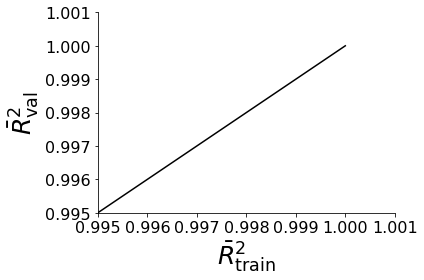

In [89]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.995, 1.001])
ax.set_ylim([0.995, 1.001])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [90]:
df[df['r2_adj_train'] > 0.95]

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
0    0.149146  0.149601    0.688641  0.689267   0.083088  0.089041   
1    0.122719  0.123228    0.558417  0.559260   0.072496  0.078357   
2    0.137113  0.137456    0.625135  0.625221   0.078434  0.084488   
3    0.148927  0.149868    0.689017  0.691790   0.082000  0.088121   
4    0.115888  0.115827    0.525509  0.523853   0.069137  0.074624   
5    0.126362  0.126460    0.573158  0.572244   0.074901  0.080540   
6    0.122415  0.122484    0.568599  0.567524   0.072410  0.077928   
7    0.122420  0.122715    0.560497  0.560215   0.072653  0.078290   
8    0.121869  0.122068    0.553993  0.553478   0.072950  0.078776   
9    0.111061  0.111348    0.510073  0.509773   0.067857  0.073860   
10   0.116190  0.116280    0.525877  0.524763   0.070070  0.075942   
11   0.115691  0.115951    0.527905  0.527742   0.071699  0.077675   
12   0.108602  0.108943    0.499402  0.499437   0.067240  0.073345   
13   0.106709  0.107173    0.482551  0.483004   0.065293  0.071663   
14   0.107244  0.107641    0.484261  0.484623   0.069127  0.075236   
15   0.107115  0.107538    0.495050  0.495419   0.066662  0.072972   
16   0.104845  0.105552    0.474355  0.475899   0.064899  0.071447   
17   0.108721  0.108914    0.490770  0.490064   0.068996  0.075344   
18   0.107231  0.107844    0.491995  0.493358   0.066656  0.073058   
19   0.104701  0.104704    0.475070  0.473535   0.067181  0.072783   
20   0.103890  0.103956    0.473673  0.472333   0.068069  0.074126   
21   0.105880  0.106347    0.490281  0.490715   0.065120  0.071872   
22   0.105073  0.105489    0.475118  0.475395   0.065058  0.071244   
23   0.111820  0.112337    0.503765  0.504666   0.068158  0.074531   
24   0.105044  0.105899    0.486282  0.488565   0.064816  0.071884   
25   0.102046  0.102570    0.461152  0.462001   0.063054  0.069407   
26   0.113292  0.113713    0.511196  0.511539   0.067350  0.074040   
27   0.097304  0.098159    0.446622  0.448583   0.062581  0.070296   
28   0.101465  0.102245    0.458040  0.459862   0.063122  0.070239   
29   0.097994  0.098114    0.444916  0.443960   0.064597  0.071121   
30   0.099372  0.100566    0.458112  0.461682   0.062238  0.070525   
31   0.101741  0.103246    0.458986  0.463881   0.061831  0.070943   
32   0.103574  0.104232    0.466656  0.467921   0.064871  0.072957   
33   0.101499  0.103025    0.469385  0.474273   0.062040  0.071822   
34   0.101795  0.103546    0.459837  0.465854   0.062751  0.071966   
35   0.108231  0.109362    0.488201  0.491750   0.065358  0.073533   

    median_percentile_max_error_train  median_percentile_max_error_val  \
0                            1.297736                         1.285661   
1                            1.065968                         1.057569   
2                            1.247292                         1.233935   
3                            1.292672                         1.292232   
4                            0.984513                         0.977024   
5                            1.083134                         1.077614   
6                            1.257952                         1.251460   
7                            1.169875                         1.155635   
8                            1.111177                         1.102335   
9                            0.787894                         0.782292   
10                           0.888177                         0.880526   
11                           0.829753                         0.824332   
12                           0.769731                         0.766369   
13                           0.763291                         0.759993   
14                           0.755568                         0.751367   
15                           0.890610                         0.886457   
16                           0.757882                         0.755781   
17                           0.854923                         0.848894   
18     

In [91]:
# LOad history of best config

In [92]:
best_model_folder = best_config['trial_id']

In [93]:
result_dir

'/data/project/general/aerosolretriev//aerosol_results_mp/HyperParameterTrials/GraspOpen/GraspOpen2/'

In [94]:
best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

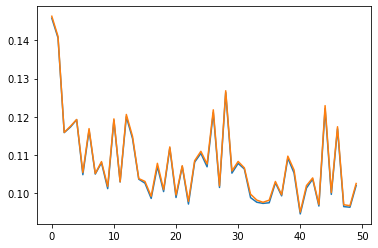

In [95]:
plt.plot(best_model_hist['MAE_train'])
plt.plot(best_model_hist['MAE_val'])

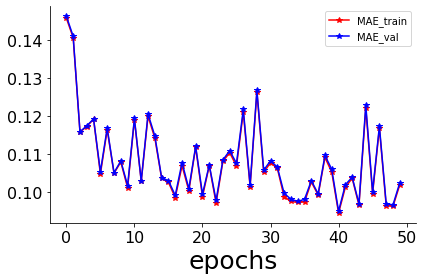

In [96]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


In [97]:
best_model_hist.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'trial_id', 'experiment_id',
       'date', 'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore'],
      dtype='object')

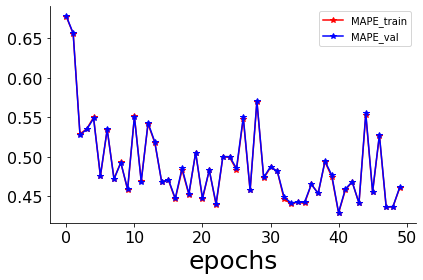

In [98]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAPE_train'],'r*-', label = 'MAPE_train')
ax.plot(best_model_hist['MAPE_val'],'b*-',label =  'MAPE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

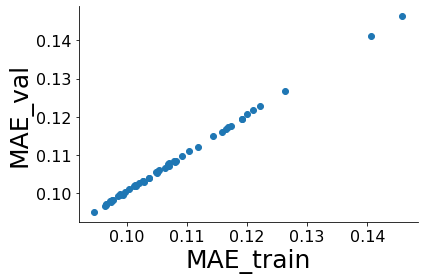

In [99]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['MAE_train'],best_model_hist['MAE_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

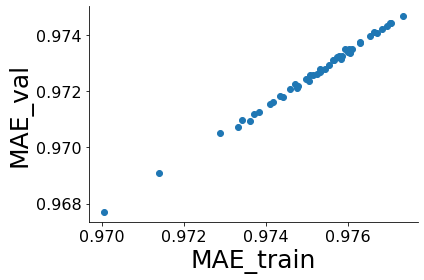

In [100]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['r2_train'],best_model_hist['r2_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [101]:
to_plot

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                        relu                 50             2             50   
1                        relu                125             2             50   
2                        relu                250             2             50   
3                        relu                 50             3             50   
4                        relu                125             3             50   
5                        relu                250             3             50   
6                        relu                 50             4             50   
7                        relu                125             4             50   
8                        relu                250             4             50   
9                        relu                 50             2             50   
10                       relu                125             2             50   
11                       relu                250             2             50   
12                       relu                 50             3             50   
13                       relu                125             3             50   
14                       relu                250             3             50   
15                       relu                 50             4             50   
16                       relu                125             4             50   
17                       relu                250             4             50   
18                       relu                 50             2             50   
19                       relu                125             2             50   
20                       relu                250             2             50   
21                       relu                 50             3             50   
22                       relu                125             3             50   
23                       relu                250             3             50   
24                       relu                 50             4             50   
25                       relu                125             4             50   
26                       relu                250             4             50   
27                       relu                 50             2             50   
28                       relu                125             2             50   
29                       relu                250             2             50   
30                       relu                 50             3             50   
31                       relu                125             3             50   
32                       relu                250             3             50   
33                       relu                 50             4             50   
34                       relu                125             4             50   
35                       relu                250             4             50   

    config/learning_rate config/loss                        config/optimizer  \
0                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
1                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
2                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
3                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
4                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
5                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
6                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
7                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
8                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
9                 0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
10                0.0005         MSE  <class 'keras.optimizer_v2.adam.Adam'>   
11                0.0005         MSE  <class 

In [102]:
to_plot_ow.columns

Index(['activation_function', 'batch_size', 'depth', 'epochs', 'learning_rate',
       'loss', 'optimizer', 'preprocessor_x', 'preprocessor_y',
       'training_repetitions', 'width', 'x_noise', 'r2_adj_val'],
      dtype='object')

# create overview plot

In [103]:
best_config

MAE_train                                                                     0.102046
MAE_val                                                                        0.10257
MAPE_train                                                                    0.461152
MAPE_val                                                                      0.462001
MSE_train                                                                     0.063054
MSE_val                                                                       0.069407
median_percentile_max_error_train                                             0.680174
median_percentile_max_error_val                                               0.678224
90_percentile_max_error_train                                                 1.710874
90_percentile_max_error_val                                                   1.696526
r2_train                                                                      0.976532
r2_val                                     

KeyError: 'config/lr'

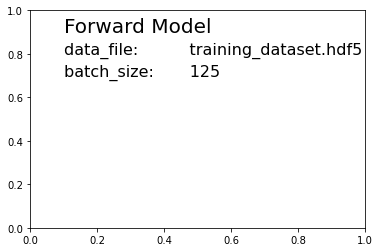

In [104]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='Forward Model',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='data_file:          ' +os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='batch_size:       ' +str(best_config['config/batch_size']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='learning_rate:  '+str(best_config['config/lr']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='depth:              '+str(best_config['config/depth']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='width:              '+str(best_config['config/width']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='epochs:            '+str(best_config['iterations_since_restore']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_train:    '+str(np.round(best_config['r2_adj_train'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_val:       '+str(np.round(best_config['r2_adj_val'],3)),fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/forward_model_description.jpg',bbox_inches='tight')

1 0
1 1
1 2


ValueError: Could not interpret input 'lr'

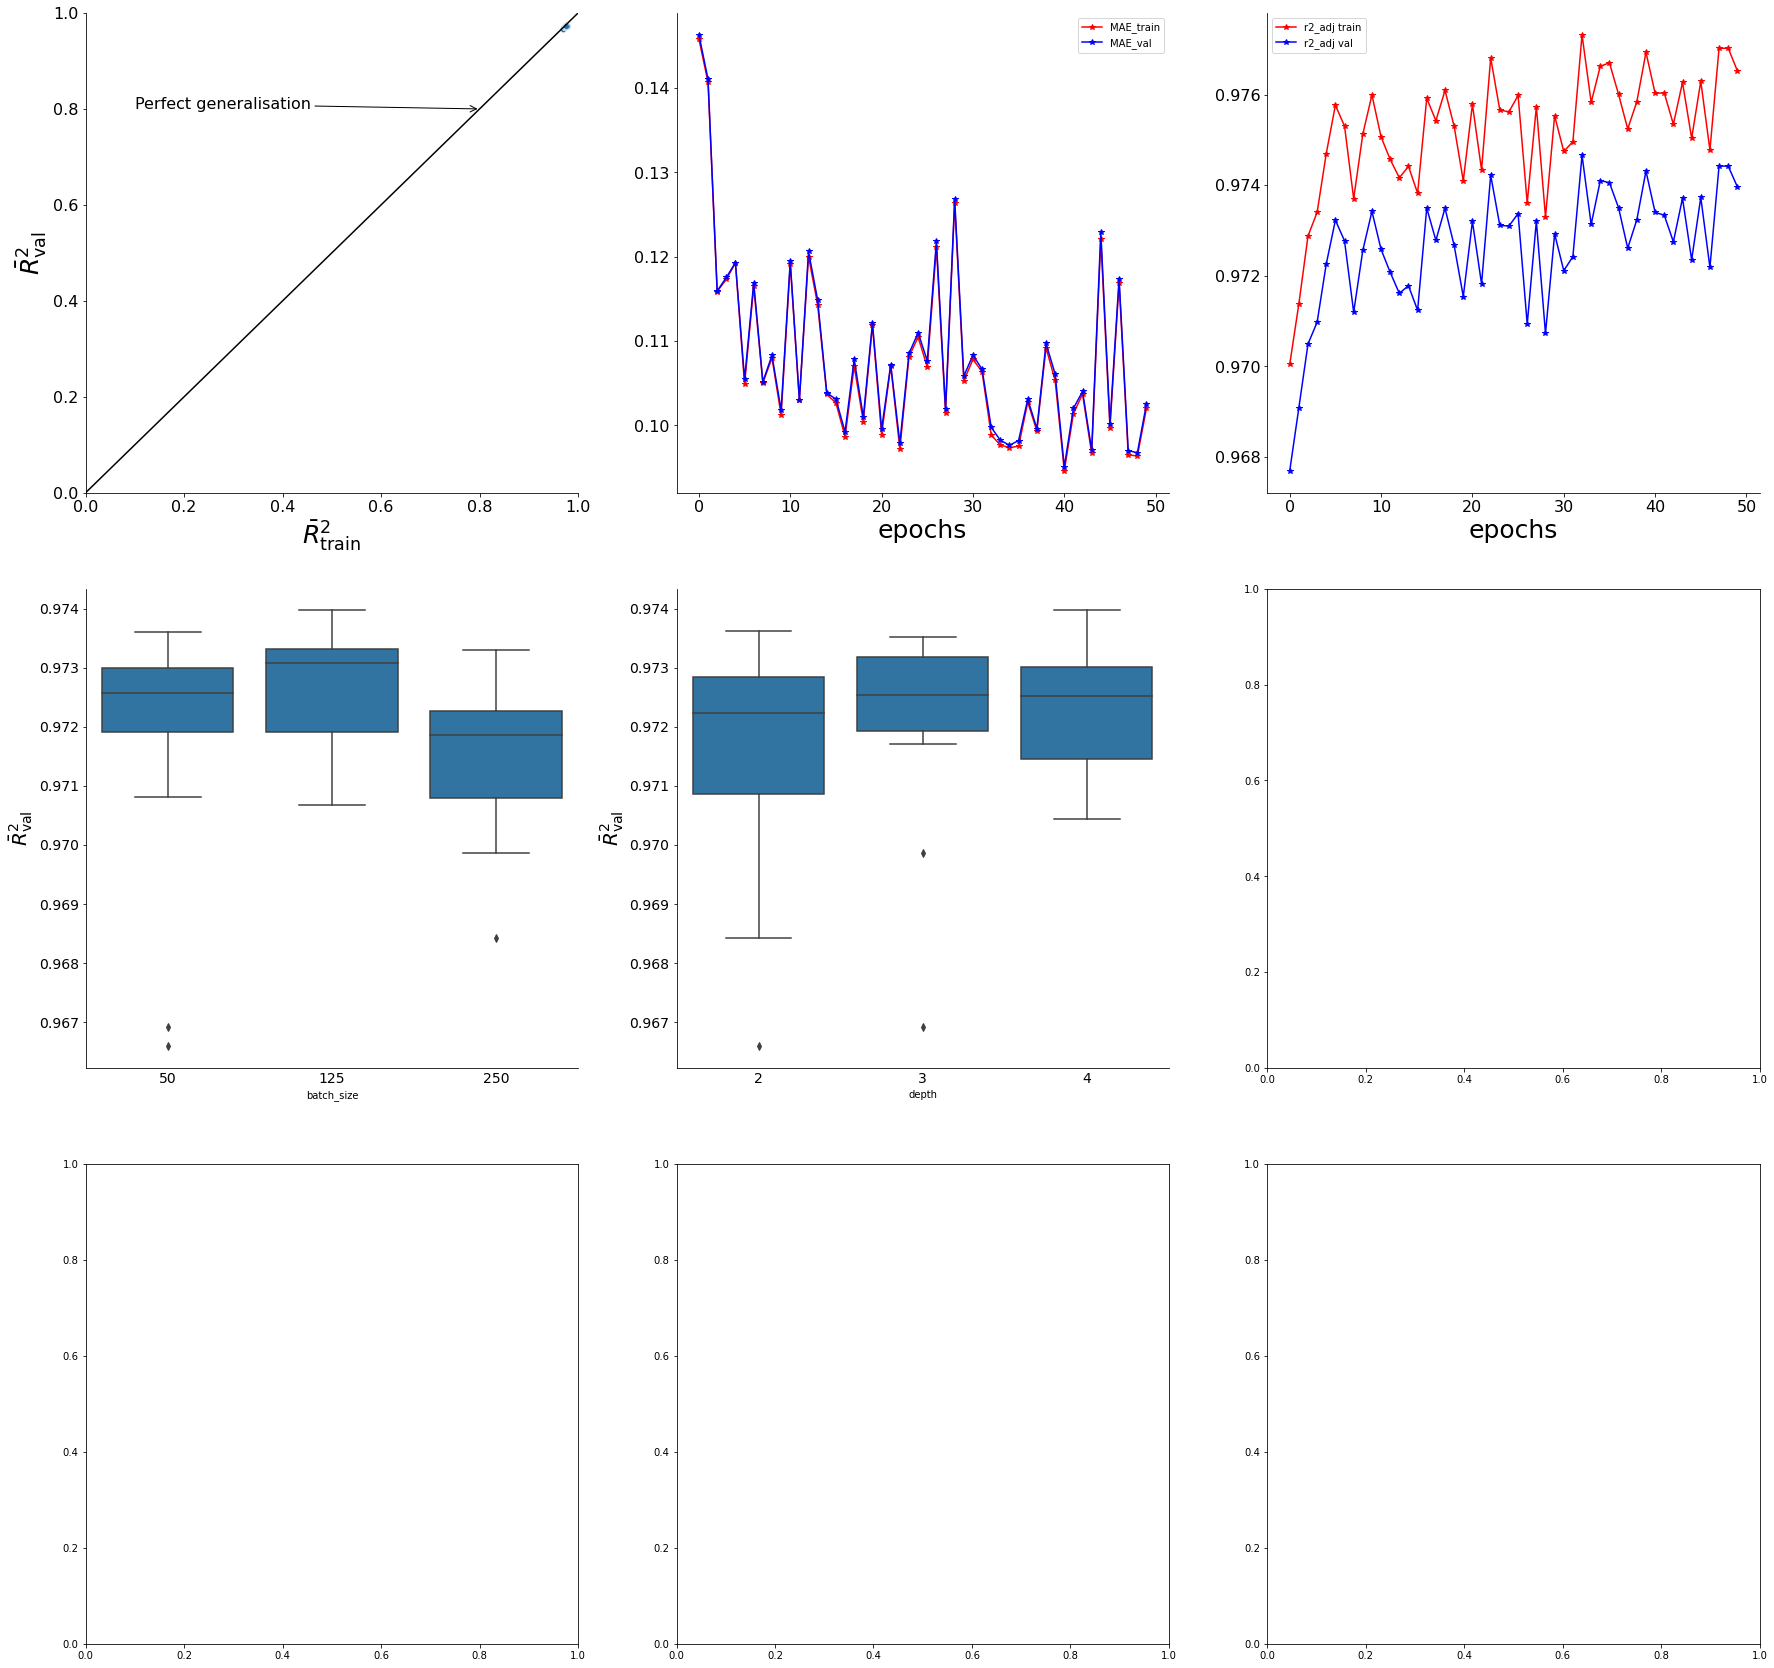

In [105]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

ax= axes[0,0]
sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])


ax = axes[0,1]
ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()

ax = axes[0,2]

ax.plot(best_model_hist['r2_adj_train'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()


axeslist= [[1,0],[1,1],[1,2],[2,0],[2,1]]
i = 0

plot_columns_list = ['batch_size', 'depth', 'lr', 'width']

for param in plot_columns_list:
    if param == 'r2_adj_val':
        continue
    ax = axes[axeslist[i][0],axeslist[i][1]]
    print(axeslist[i][0],axeslist[i][1])
    i = i+1
    sns.boxplot(x=param, y='r2_adj_val',data=to_plot_ow, color=sns.color_palette()[0],ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 #   ax.set_ylim([0,1])
 #   ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)



ax = axes[2,2]

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0],ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()


fig.savefig(f'{plot_dir}/hyperparameter_scan_overview.jpg',bbox_inches='tight')

# Save configurations of best model

In [ ]:
best_config_df = pd.DataFrame(best_config)

In [ ]:
best_config_df = best_config_df.T
best_config_df

In [106]:
best_config_df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'trial_id', 'experiment_id',
       'date', 'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'config/activation_function',
       'config/batch_size', 'config/datafile', 'config/depth', 'config/epochs',
       'config/learning_rate', 'config/loss', 'config/optimizer',
       'config/preprocessor_x', 'config/preprocessor_y',
       'config/training_repetitions', 'config/width', 'config/x_noise',
       'logdir'],
      dtype='object')

In [107]:
best_config_df.to_csv(f'{model_dir}/configs.csv')

In [108]:
model_dir

'/data/project/general/aerosolretriev//aerosol_results_mp/HyperParameterTrials/GraspOpen/GraspOpen2/models'